<a href="https://colab.research.google.com/github/Seife1/Financial-Analysis-of-Stocks-from-Financial-News/blob/task-1/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Analysis of Stocks from Financial News**

## Data Overview

This project focuses on the detailed analysis of a large corpus of financial news data to discover correlations between news sentiment and stock market movements.

FNSPID (Financial News and Stock Price Integration Dataset), is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

## Configuring GPU


In [ ]:
# Configuring GPU
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
        print('\nGPU Found! Using GPU...')
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data_frame = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/raw_analyst_ratings.csv')

## Explanatory Data Analysis (EDA)

In [ ]:
# list the first 5 rows from the dataline
data_frame.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
# Drop the first column (Unnamed: 0)
data_frame.drop('Unnamed: 0',axis=1,inplace=True)
# Print Info about the data_frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [ ]:
# Check if there is a missing data
data_frame.isnull().sum()

,0
headline,0
url,0
publisher,0
date,0
stock,0


In [ ]:
# Calculate the length of each headline and store it in a new column 'headline_length'
data_frame['headline_length'] = data_frame['headline'].apply(len)

# Display the first few rows to verify the new column
print(data_frame[['headline', 'headline_length']].head())

                                            headline  headline_length
0            Stocks That Hit 52-Week Highs On Friday               39
1         Stocks That Hit 52-Week Highs On Wednesday               42
2                      71 Biggest Movers From Friday               29
3       46 Stocks Moving In Friday's Mid-Day Session               44
4  B of A Securities Maintains Neutral on Agilent...               87


In [ ]:
# Perform descriptive statistics on the 'headline_length' column
headline_length_stats = data_frame['headline_length'].describe().T

headline_length_stats

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


In [ ]:
# Count the number of articles per publisher
publisher_counts = data_frame['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


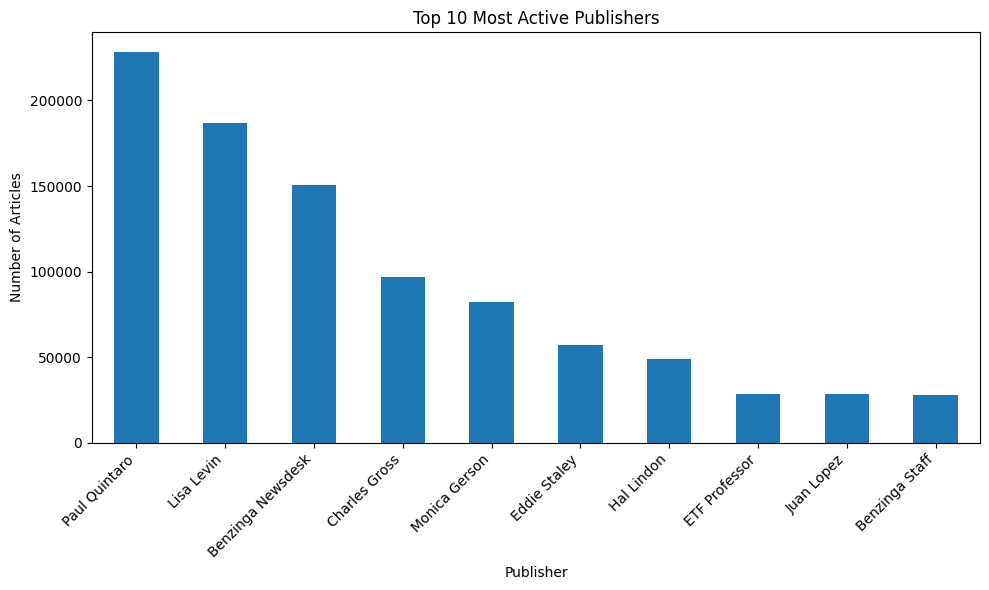

In [ ]:
import matplotlib.pyplot as plt

# Visualize the top publishers
# Plot the top 10 publishers
top_publishers = publisher_counts.head(10)
top_publishers.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

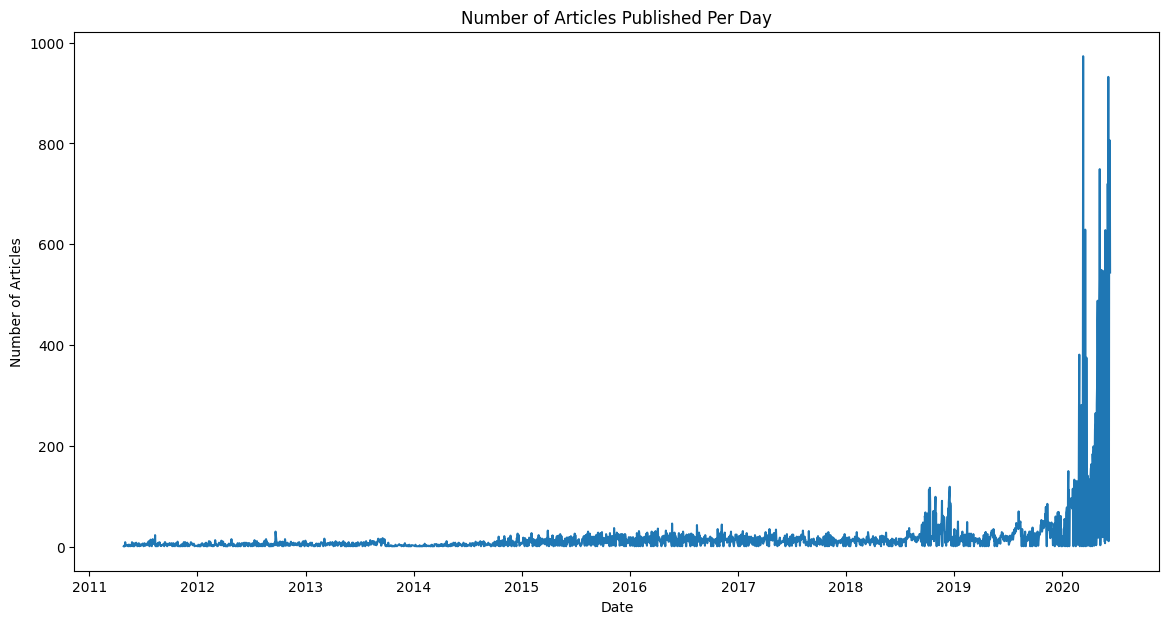

In [ ]:
# Convert the 'date' column to datetime format
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce', infer_datetime_format=True)

# Analyze trends over time by resampling the data (e.g., by day, week, or month)
# Here we count the number of articles per day
articles_per_day = data_frame['date'].dt.date.value_counts().sort_index()

# Plotting the number of articles published per day
articles_per_day.plot(kind='line', figsize=(14, 7))
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# Find out the specific days with the highest activity
top_days = articles_per_day.nlargest(10)
print(top_days)

date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
2020-05-07    749
2020-06-03    720
2020-03-19    629
2020-05-26    628
2020-05-13    549
Name: count, dtype: int64


### Sentiment Analysis

Seek to quantify the emotional insensity of headlines within financial news.

**Calculate the Number of each stock(tickers) from our data sets**

In [ ]:
tickers = data_frame['stock'].unique().tolist()
print(f"No. of unique tickers: {len(tickers)} from 1407328 articles")
# Create a dictionary with 'key' tickers and 'value' No. of Shares in the above dataframe
portfolio = {t: data_frame[data_frame['stock'] == t].shape[0] for t in tickers}
portfolio

No. of unique tickers: 6204 from 1407328 articles


{'A': 1433,
 'AA': 2739,
 'AAC': 162,
 'AADR': 2,
 'AAL': 460,
 'AAMC': 40,
 'AAME': 50,
 'AAN': 426,
 'AAOI': 422,
 'AAON': 121,
 'AAP': 825,
 'AAPL': 441,
 'AAU': 35,
 'AAV': 43,
 'AAVL': 78,
 'AAWW': 312,
 'AAXJ': 8,
 'AB': 304,
 'ABAC': 62,
 'ABAX': 90,
 'ABB': 384,
 'ABBV': 539,
 'ABC': 694,
 'ABCB': 10,
 'ABCD': 58,
 'ABCO': 211,
 'ABCW': 18,
 'ABDC': 66,
 'ABEV': 65,
 'ABG': 233,
 'ABGB': 93,
 'ABIO': 70,
 'ABM': 110,
 'ABMD': 70,
 'ABR': 170,
 'ABTL': 110,
 'ABX': 997,
 'ABY': 68,
 'ACAD': 597,
 'ACAS': 219,
 'ACAT': 212,
 'ACC': 266,
 'ACCO': 165,
 'ACCU': 1,
 'ACE': 272,
 'ACET': 193,
 'ACFC': 48,
 'ACFN': 61,
 'ACG': 5,
 'ACGL': 269,
 'ACH': 244,
 'ACHC': 320,
 'ACHN': 677,
 'ACIW': 218,
 'ACLS': 189,
 'ACM': 480,
 'ACMP': 94,
 'ACN': 1323,
 'ACNB': 22,
 'ACOR': 657,
 'ACP': 21,
 'ACPW': 85,
 'ACRE': 114,
 'ACRX': 485,
 'ACSF': 14,
 'ACST': 273,
 'ACT': 570,
 'ACTA': 54,
 'ACTG': 674,
 'ACTS': 58,
 'ACU': 99,
 'ACUR': 157,
 'ACWI': 9,
 'ACWV': 14,
 'ACWX': 5,
 'ACXM': 203,
 

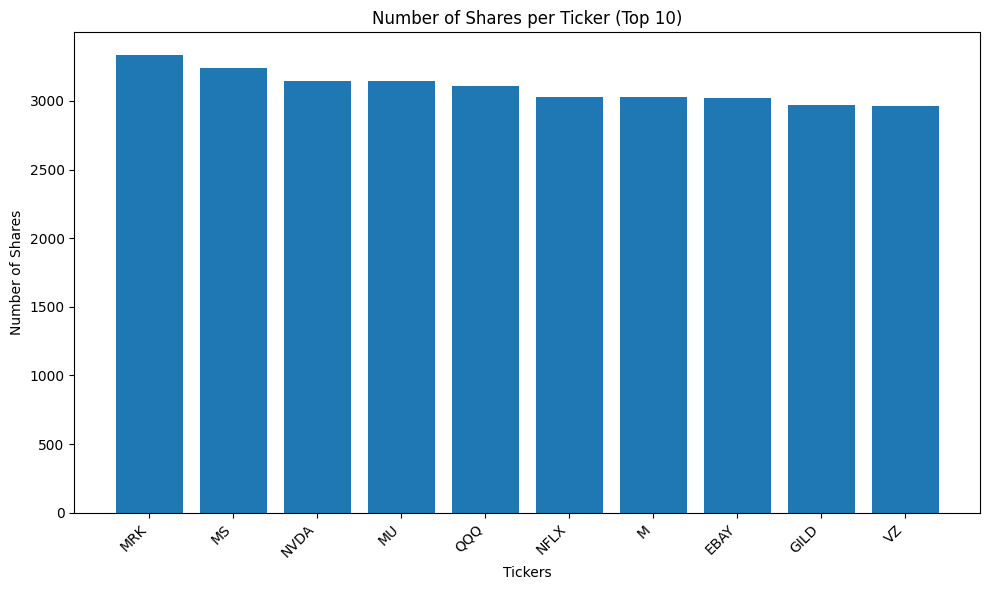

In [ ]:
# Sort the portfolio by the number of shares for better visualization
sorted_portfolio = dict(sorted(portfolio.items(), key=lambda item: item[1], reverse=True))

# Extract tickers and share counts for plotting
tickers = list(sorted_portfolio.keys())
shares = list(sorted_portfolio.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(tickers[:10], shares[:10])
plt.xlabel('Tickers')
plt.ylabel('Number of Shares')
plt.title('Number of Shares per Ticker (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
sentiment_data=data_frame.copy()
sentiment_data.head()

,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [ ]:
# Sentiment Analysis with Vader
# NLTK vader for sentiment analysis
import nltk
# nltk.downloader.download('vander_lexicon')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()


# Iterate through the headlines and get the polarity scores using vader
scores = sentiment_data['headline'].apply(vader.polarity_scores).tolist()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
# Convert the 'scores' list of dicts into a DataFrame
scores_sentiment_data = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = sentiment_data.join(scores_sentiment_data, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date, errors='coerce').dt.date

# Categorize the sentiment scores
parsed_and_scored_news['sentiment_category'] = pd.cut(parsed_and_scored_news['compound'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
parsed_and_scored_news.head()

,headline,url,publisher,date,stock,headline_length,neg,neu,pos,compound,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,0.0,0.833,0.167,0.296,Neutral


In [62]:
parsed_and_scored_news['sentiment_category'].value_counts()

,count
sentiment_category,
Neutral,1070915
Negative,182864
Positive,109718
Very Negative,43831


In [59]:
# Select numeric columns for the groupby operation
num_columns = ['neg', 'neu', 'pos', 'compound']

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['stock', 'date'])[num_columns].mean()

mean_scores.head()

neg    neu       pos  compound
stock date                                           
A     2020-05-22  0.043143  0.895  0.061857    0.0480
      2020-05-26  0.000000  1.000  0.000000    0.0000
      2020-06-03  0.000000  1.000  0.000000    0.0000
      2020-06-05  0.000000  1.000  0.000000    0.0000
AA    2020-05-18  0.000000  0.671  0.329000    0.8519

In [63]:
# Print the stock and date at which max and min sentiment score
print("   Maximum mean score value stock and date")
print(mean_scores['compound'].idxmax())
print()
print("   Minimum mean score value stock and date")
print(mean_scores['compound'].idxmin())


   Maximum mean score value stock and date
('BKS', datetime.date(2019, 6, 13))

   Minimum mean score value stock and date
('GSK', datetime.date(2020, 5, 14))


From the tickers we have, One of the top 10 stock based on the number of shares in the data frame is Netflix(NFLX). So now, I will try to visualize it mean sentiment score.

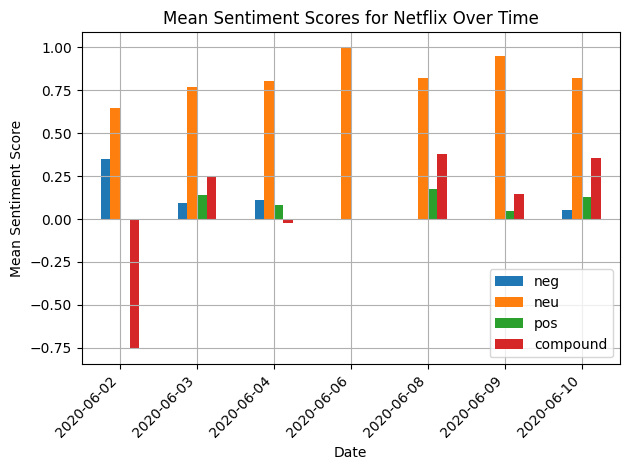

In [60]:
# plot a bar chart with pandas

if parsed_and_scored_news[parsed_and_scored_news['stock'] == 'NFLX'].empty:
    print("No data available for Netflix.")
else:
    # Filter the data for Netflix
    netflix_data = parsed_and_scored_news[parsed_and_scored_news['stock'] == 'NFLX']

    # Group by date and calculate the mean
    mean_scores_for_nflx = netflix_data.groupby('date')[num_columns].mean()

    # Plot the mean scores
    mean_scores_for_nflx.plot(kind='bar')
    plt.title('Mean Sentiment Scores for Netflix Over Time')
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid()

In [ ]:
# Print the number of each sentiment category for netflix stock
netflix_data['sentiment_category'].value_counts()


,count
sentiment_category,
Neutral,2242
Negative,357
Positive,342
Very Negative,87


### Topic Modeling

**Text Preparation**

In [64]:
# Punctuation removal
import string

modeling_data=data_frame.copy()

def rem_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: rem_punct(x))

In [65]:
# lowercasing text
modeling_data['headline'] = modeling_data['headline'].str.lower()

In [66]:
# tokenization
modeling_data['headline'] = modeling_data['headline'].str.split()

**Stop word removal**
Stopwords are commonly used words that are removed since they add no value to the analysis like ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll", ...]

In [67]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]
    return text

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatization**

This is an algorithmic process followed to convert the word to its root form while also keeping its meaning intact

In [69]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lemma = WordNetLemmatizer()

def word_lemmatizer(text):
    text = [word_lemma.lemmatize(word) for word in text]
    return text

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: word_lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Model Preparation**

 After complete model preparation we will obtain the **main topics** for each of the top 3 Publishers in the latest year.

In [70]:
# print the name of top 10 publishers
publishers = top_publishers.index.tolist()
publishers

['Paul Quintaro',
 'Lisa Levin',
 'Benzinga Newsdesk',
 'Charles Gross',
 'Monica Gerson',
 'Eddie Staley',
 'Hal Lindon',
 'ETF Professor',
 'Juan Lopez',
 'Benzinga Staff']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure 'date' column is in datetime format
modeling_data['date'] = pd.to_datetime(modeling_data['date'])

# Filter the data for the latest year's second semester (July to December)
latest_year = modeling_data['date'].dt.year.max()
latest_year_data = modeling_data[
    (modeling_data['date'].dt.year == latest_year)]
latest_year_data.head()

# Function to summarize topics
def summarize_topic(words):
    # This is a simple example; you might use more complex logic to generate summaries
    if 'stock' in words:
        return "Stock Market Trends"
    elif 'earnings' in words:
        return "Earnings Reports"
    elif 'acquisition' in words:
        return "Mergers and Acquisitions"
    else:
        return "General Financial News"

# Iterate over the top  publishers
for publisher in publishers[:3]:
  print(f"============================================{publisher}===============================================")
  publisher_headlines = latest_year_data[latest_year_data['publisher'] == publisher]
  # Iterate over each row in the DataFrame, not by index
  for _, row in publisher_headlines.iterrows():
    headline = row['headline']  # Access the list of words directly
    vect1 = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    # Join the words back into a string for TfidfVectorizer
    vect_text1 = vect1.fit_transform([' '.join(headline)])
    lda_model = LatentDirichletAllocation(n_components=1, learning_method='online', random_state=42, max_iter=1)
    lda_t = lda_model.fit(vect_text1)

    # Summarize each topic
    vocab = vect1.get_feature_names_out()
    for k, comp in enumerate(lda_model.components_):
        componentTerms = zip(vocab, comp)
        sortedTerms = sorted(componentTerms, key=lambda x: x[1], reverse=True)[:10]
        topic_words = [t[0] for t in sortedTerms]
        summary = summarize_topic(topic_words)
        print(f"Topic {k}: {summary}")
        print("Top words:", ", ".join(topic_words))
        print("\n")

Streaming output truncated to the last 5000 lines.
Topic 0: General Financial News
Top words: q4, territorial, 05, 054, eps, bancorp, yoy


Topic 0: General Financial News
Top words: beat, estimate, biopharma, 1070, theravance, miss, 1400, 19900m, 18130m, eps


Topic 0: General Financial News
Top words: development, report, dosed, hospitalized, acute, phase, injury, td0903, biopharma, study


Topic 0: General Financial News
Top words: coronavirus, submitted, first, human, acute, study, injury, trial, application, td9003


Topic 0: General Financial News
Top words: tuanche, q1, rmb9mrmb10m, see, sale


Topic 0: General Financial News
Top words: eps, yoy, q4, tuanche, 0010, 0030, 32930m, 26300m, sale


Topic 0: General Financial News
Top words: financial, limited, operating, affected, result, anticipates, epidemic, covid19, materially, tuanche


Topic 0: General Financial News
Top words: see, tuanche, adverse, coronavirus, outbreak, impact, warns


Topic 0: Stock Market Trends
Top words:

## **Time Series Analysis**

In [ ]:
ts_data=data_frame.copy()

In [72]:
# Count headlines per day
daily_headlines = ts_data.groupby('date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

time_series_data.head(10)

,Headlines_Count
date,
2011-04-27 21:01:48-04:00,1
2011-04-28 13:49:29-04:00,1
2011-04-28 15:00:36-04:00,1
2011-04-29 13:47:06-04:00,1
2011-04-29 16:11:05-04:00,1
2011-04-30 16:52:35-04:00,1
2011-05-01 18:18:28-04:00,1
2011-05-02 02:17:31-04:00,1
2011-05-02 03:24:46-04:00,3


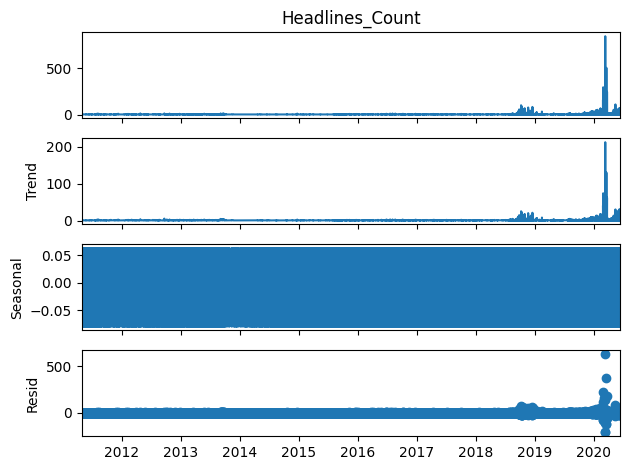

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=4)

# plotting the components
decomposition.plot()
plt.tight_layout()
plt.show()


In [74]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
